<a href="https://colab.research.google.com/github/Marwenboughanmi/EVS-project-1/blob/main/EVProduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the required libraries
!pip install prophet

In [86]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving share-car-stocks-electric.csv to share-car-stocks-electric.csv


In [79]:
df = pd.read_csv("share-car-stocks-electric.csv")
df.head()

,Entity,Code,Year,Share of car stocks that are electric
0,Australia,AUS,2011,0.00039
1,Australia,AUS,2012,0.00240
2,Australia,AUS,2013,0.00460
3,Australia,AUS,2014,0.01400
4,Australia,AUS,2015,0.02700


In [80]:
# group by country in the DataFrame
df_group_year = df.groupby("Year")
df_group_year.head()

,Entity,Code,Year,Share of car stocks that are electric
0,Australia,AUS,2011,0.00039
1,Australia,AUS,2012,0.00240
2,Australia,AUS,2013,0.00460
3,Australia,AUS,2014,0.01400
4,Australia,AUS,2015,0.02700
...,...,...,...,...
65,Chile,CHL,2012,0.00038
66,Chile,CHL,2013,0.00051
77,China,CHN,2010,0.00310
91,Denmark,DNK,2010,0.00370


In [81]:
df_group_country = df.groupby("Entity")
df_group_country.head()

,Entity,Code,Year,Share of car stocks that are electric
0,Australia,AUS,2011,0.00039
1,Australia,AUS,2012,0.00240
2,Australia,AUS,2013,0.00460
3,Australia,AUS,2014,0.01400
4,Australia,AUS,2015,0.02700
...,...,...,...,...
451,World,OWID_WRL,2010,0.00230
452,World,OWID_WRL,2011,0.00750
453,World,OWID_WRL,2012,0.02000
454,World,OWID_WRL,2013,0.04000


In [82]:
df_group_country = df.groupby(["Year", "Entity"]).sum()
df_group_country



Code  Share of car stocks that are electric
Year Entity                                                         
2010 Austria              AUT                                 0.0079
     Belgium              BEL                                 0.0013
     China                CHN                                 0.0031
     Denmark              DNK                                 0.0037
     Europe                 0                                 0.0039
...                       ...                                    ...
2023 Switzerland          CHE                                 5.8000
     Turkey               TUR                                 0.6300
     United Kingdom       GBR                                 5.0000
     United States        USA                                 2.1000
     World           OWID_WRL                                 3.2000

[465 rows x 2 columns]

<Axes: xlabel='Year,Entity'>

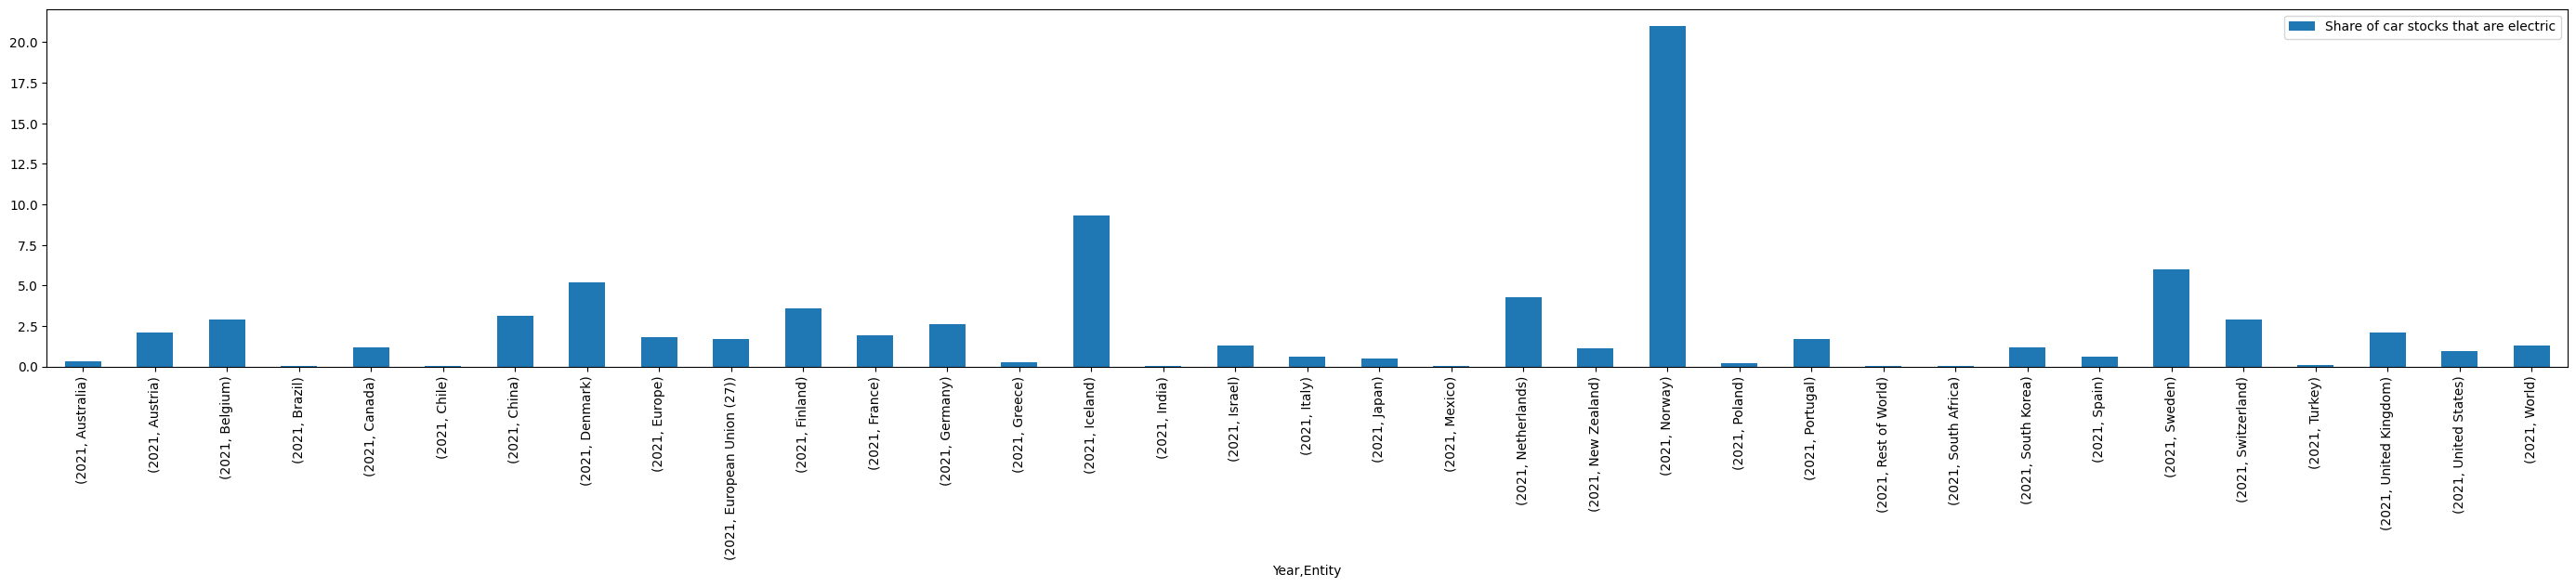

In [ ]:
df_group_country.loc['2021':'2021'].plot(kind='bar', figsize=(35,5))

Code  Share of car stocks that are electric
Year Entity                                                        
2010 China               CHN                                 0.0031
     Norway              NOR                                 0.1200
     United States       USA                                 0.0017
     World          OWID_WRL                                 0.0023
2011 China               CHN                                 0.0092
...                      ...                                    ...
2023 China               CHN                                 7.6000
     Mexico              MEX                                 0.1400
     Norway              NOR                                29.0000
     United States       USA                                 2.1000
     World          OWID_WRL                                 3.2000

[69 rows x 2 columns]

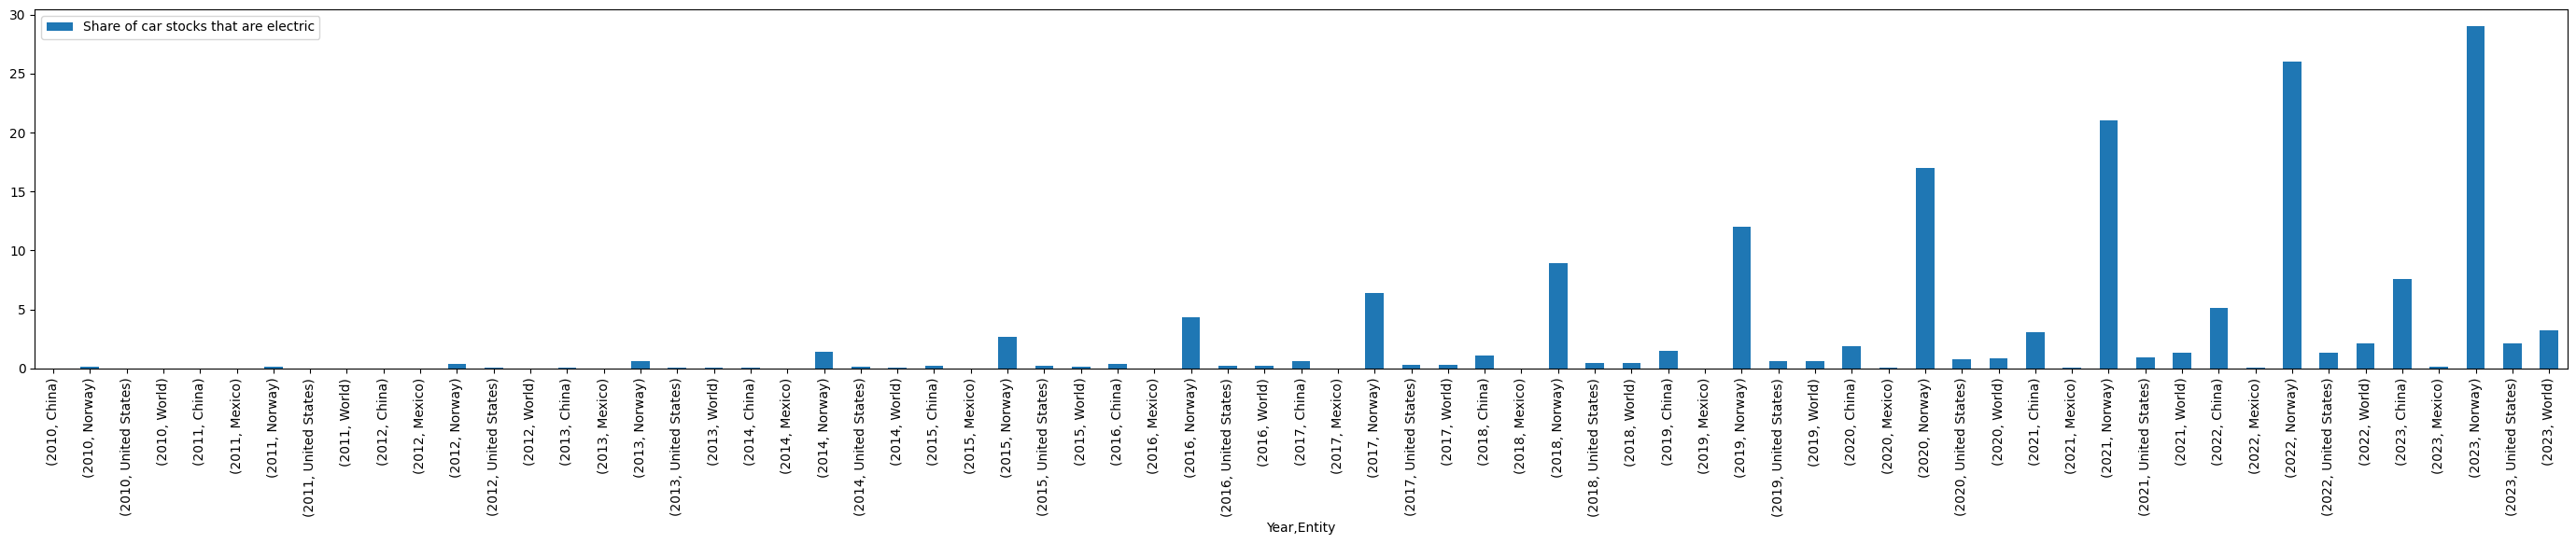

In [ ]:
selected_countries =['United States', 'China', 'Norway', 'Mexico','World']
selected_df = df[df['Entity'].isin(selected_countries)]
selected_df = selected_df.groupby(['Year', 'Entity']).sum()

selected_df.plot(kind='bar', figsize=(35,5))
display(selected_df)

KeyError: 'Norway'

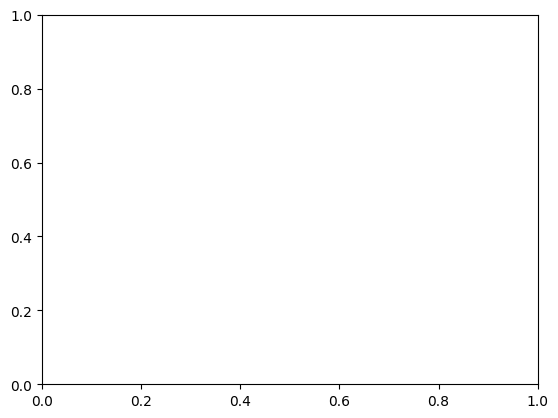

In [91]:
fig, ax = plt.subplots()  # Create a figure and an axes object

df.loc[:,'Norway'].plot(ax=ax, label='Norway')
#df.loc['China'].plot(ax=ax, label='China')
#df.loc['United States'].plot(ax=ax, label='United States')
#df.loc['Mexico'].plot(ax=ax, label='Mexico')
#df.loc['World'].plot(ax=ax, label='World')

plt.legend(loc='best')
plt.show()

In [84]:
norway_df = df[df['Entity'] == 'Norway']
norway_df = norway_df.set_index('Year')
del norway_df['Code']
norway_df

,Entity,Share of car stocks that are electric
Year,,
2010,Norway,0.12
2011,Norway,0.17
2012,Norway,0.36
2013,Norway,0.64
2014,Norway,1.40
2015,Norway,2.70
2016,Norway,4.30
2017,Norway,6.40
2018,Norway,8.90


<Axes: xlabel='Year'>

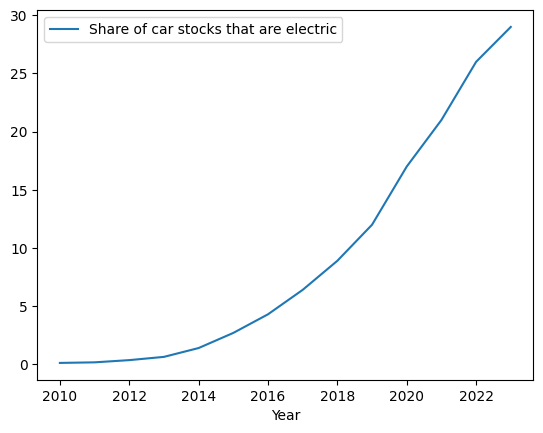

In [ ]:
norway_df.plot()